# Mobile Game Analysis

### An analysis of user progress data

Data can be found on Kaggle at [this link](https://www.kaggle.com/datasets/manchvictor/prediction-of-user-loss-in-mobile-games)

level_seq.csv

Each record is an attempt to play a level. The meaning of each column is as follows:
- 'user_id' : user id, which can be matched with those in training, verification, and test sets;
- 'level_id' : level id;
- f_success ': indicates whether to complete the clearance (1: completes the clearance, 0: fails).
- f_duration ': the duration of the attempt (unit: s);
- f_reststep ': the ratio of the remaining steps to the limited steps (failure is 0);
- f_help ': Whether extra help, such as props and hints, was used (1: used, 0: not used);
'time' : indicates the timestamp.

level_meta.csv

Some statistical characteristics of each level can be used to represent the level. The meaning of each column is as follows:

- f_avg_duration ': Average time spent on each attempt (unit s, including successful and failed attempts);
- 'f_avg_passrate' : average clearance rate;
- f_avg_win_duration ': Average time spent on each clearance (in s, including only the attempts to clear the clearance);
- f_avg_retrytimes' : Average number of retries (the second time to play the same level counts as the first retry);
- 'level_id' : indicates the id of the level, which can be matched with the level in level_seq.csv.

# Table of Contents

[Step 1: Import Libraries and Data](#Step-1:-Import-and-Cleaning)

[Step 2: Exploratory Data Analysis](#Step-2:-EDA)

> [Step 2a: Users](#Step-2a:-Users)

> [Step 2b: Levels](#Step-2b:-Levels)

## Step 1: Import and Cleaning

In [1]:
#Import libraries
import pandas as pd
import glob
import os
import datetime as dt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
#Import csv files
path = "/Users/raws/Downloads/mobile_game_data"
csv_files = glob.glob(path + "/*.csv")

csv_files

['/Users/raws/Downloads/mobile_game_data/test.csv',
 '/Users/raws/Downloads/mobile_game_data/level_seq.csv',
 '/Users/raws/Downloads/mobile_game_data/dev.csv',
 '/Users/raws/Downloads/mobile_game_data/train.csv',
 '/Users/raws/Downloads/mobile_game_data/level_meta.csv']

In [3]:
#Append csvs to list using list comprehension
df_list = [pd.read_csv(filename, delimiter='\t', index_col=None, header=0) for filename in csv_files]
df_list

[      user_id
 0           1
 1           2
 2           3
 3           4
 4           5
 ...       ...
 2768     2769
 2769     2770
 2770     2771
 2771     2772
 2772     2773
 
 [2773 rows x 1 columns],
          user_id  level_id  f_success  f_duration  f_reststep  f_help  \
 0          10932         1          1       127.0    0.500000       0   
 1          10932         2          1        69.0    0.703704       0   
 2          10932         3          1        67.0    0.560000       0   
 3          10932         4          1        58.0    0.700000       0   
 4          10932         5          1        83.0    0.666667       0   
 ...          ...       ...        ...         ...         ...     ...   
 2194346    10931        40          1       111.0    0.250000       1   
 2194347    10931        41          1        76.0    0.277778       0   
 2194348    10931        42          0       121.0    0.000000       1   
 2194349    10931        42          0       115.0  

In [4]:
#Assign csvs to dataframe using list indices
users = df_list[1]
levels = df_list[4]

In [5]:
#Examine users
users.head()

,user_id,level_id,f_success,f_duration,f_reststep,f_help,time
0,10932,1,1,127.0,0.500000,0,2020-02-01 00:05:51
1,10932,2,1,69.0,0.703704,0,2020-02-01 00:08:01
2,10932,3,1,67.0,0.560000,0,2020-02-01 00:09:50
3,10932,4,1,58.0,0.700000,0,2020-02-01 00:11:16
4,10932,5,1,83.0,0.666667,0,2020-02-01 00:13:12


In [6]:
#Summary statistics for users and suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
users.describe()

,user_id,level_id,f_success,f_duration,f_reststep,f_help
count,2194351.00,2194351.00,2194351.00,2194351.00,2194351.00,2194351.00
mean,6745.03,96.84,0.53,108.12,0.17,0.04
std,3942.09,84.11,0.50,53.61,0.23,0.21
min,1.00,1.00,0.00,1.00,0.00,0.00
25%,3287.00,41.00,0.00,77.00,0.00,0.00
50%,6688.00,80.00,1.00,100.00,0.05,0.00
75%,10163.00,142.00,1.00,127.00,0.29,0.00
max,13589.00,1509.00,1.00,600.00,1.00,1.00


In [7]:
#Examine data types for users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194351 entries, 0 to 2194350
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     int64  
 1   level_id    int64  
 2   f_success   int64  
 3   f_duration  float64
 4   f_reststep  float64
 5   f_help      int64  
 6   time        object 
dtypes: float64(2), int64(4), object(1)
memory usage: 117.2+ MB


In [8]:
#Check for duplicates
users.duplicated().sum()

69322

In [9]:
#Check for null values
users.isna().sum()

user_id       0
level_id      0
f_success     0
f_duration    0
f_reststep    0
f_help        0
time          0
dtype: int64

In [10]:
#Examine duplicates
dupes = users[users.duplicated()]
dupes

,user_id,level_id,f_success,f_duration,f_reststep,f_help,time
64,10932,50,0,153.00,0.00,0,2020-02-01 17:05:43
65,10932,50,0,153.00,0.00,0,2020-02-01 17:05:43
665,2774,42,1,130.00,0.05,0,2020-02-01 10:56:34
667,2774,44,1,116.00,0.21,0,2020-02-01 11:02:32
707,2774,62,1,89.00,0.43,0,2020-02-02 09:10:50
...,...,...,...,...,...,...,...
2192592,10924,36,1,110.00,0.50,0,2020-02-02 00:45:41
2193091,13586,104,0,155.00,0.00,0,2020-02-03 21:13:35
2193569,10927,137,1,73.00,0.29,0,2020-02-02 22:36:23
2193666,10927,207,0,166.00,0.00,0,2020-02-04 20:59:36


<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Out of roughly 2.2 million rows there are about 70k duplicates.</li>
    <li>There are no null values.</li>
    <li>user_id needs to be converted to string.</li>
    <li>time needs to be converted to datetime.</li>
    <li>columns should be renamed to remove "f_".</li>
</div>

In [11]:
#Drop duplicates
users.drop_duplicates(inplace=True)

In [12]:
#Assign user_id to string type
users['user_id'] = users['user_id'].astype('str')

In [13]:
#Convert time to datetime object
users['time'] = pd.to_datetime(users['time'], format='%Y-%m-%d %H:%M:%S')

In [14]:
#Ensure type conversion success
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125029 entries, 0 to 2194350
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     object        
 1   level_id    int64         
 2   f_success   int64         
 3   f_duration  float64       
 4   f_reststep  float64       
 5   f_help      int64         
 6   time        datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 129.7+ MB


In [15]:
#Rename columns to remove "f_"
users.rename(columns=({'f_success':'success','f_duration':'duration',
                       'f_reststep':'reststep','f_help':'help'}), inplace=True)

In [16]:
#Ensure column rename success
users

,user_id,level_id,success,duration,reststep,help,time
0,10932,1,1,127.00,0.50,0,2020-02-01 00:05:51
1,10932,2,1,69.00,0.70,0,2020-02-01 00:08:01
2,10932,3,1,67.00,0.56,0,2020-02-01 00:09:50
3,10932,4,1,58.00,0.70,0,2020-02-01 00:11:16
4,10932,5,1,83.00,0.67,0,2020-02-01 00:13:12
...,...,...,...,...,...,...,...
2194346,10931,40,1,111.00,0.25,1,2020-02-03 16:26:37
2194347,10931,41,1,76.00,0.28,0,2020-02-03 16:28:06
2194348,10931,42,0,121.00,0.00,1,2020-02-03 16:30:17
2194349,10931,42,0,115.00,0.00,0,2020-02-03 16:33:40


<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Dropped ~70k duplicates.</li>
    <li>Changed user_id to string.</li>
    <li>Converted time to datetime object.</li>
    <li>Removed "f_"'s from column names.</li>
</div>

In [17]:
#Examine levels
levels.head()

,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes,level_id
0,39.89,0.94,35.58,0.02,1
1,60.68,0.99,56.72,0.00,2
2,76.95,0.99,71.79,0.00,3
3,58.17,0.99,54.84,0.00,4
4,101.78,0.95,85.65,0.03,5


In [18]:
#Examine levels data types
levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   f_avg_duration      1509 non-null   float64
 1   f_avg_passrate      1509 non-null   float64
 2   f_avg_win_duration  1509 non-null   float64
 3   f_avg_retrytimes    1509 non-null   float64
 4   level_id            1509 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.1 KB


In [19]:
#Summary statistics for levels
levels.describe()

,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes,level_id
count,1509.00,1509.00,1509.00,1509.00,1509.00
mean,514.41,0.45,116.01,3.42,755.00
std,234.73,0.19,27.66,4.07,435.76
min,39.89,0.00,35.58,0.00,1.00
25%,372.25,0.33,101.24,2.00,378.00
50%,497.65,0.40,112.67,3.29,755.00
75%,623.59,0.51,126.44,4.41,1132.00
max,2105.00,1.00,540.00,98.00,1509.00


In [20]:
#Check for duplicates
levels.duplicated().sum()

0

In [21]:
#Check for null values
levels.isna().sum()

f_avg_duration        0
f_avg_passrate        0
f_avg_win_duration    0
f_avg_retrytimes      0
level_id              0
dtype: int64

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>No null values or duplicates.</li>
    <li>No need for data type conversions. level_id is technically a serial number and I could convert it to string, but not absolutely necessary.</li>
    <li>Need to move level_id to the left side.</li>
</div>

In [22]:
#Assign columns to list
cols = levels.columns.tolist()

In [23]:
#Check column list
cols

['f_avg_duration',
 'f_avg_passrate',
 'f_avg_win_duration',
 'f_avg_retrytimes',
 'level_id']

In [24]:
#Add last element of list (level_id) to a list slice of all elements except the last element and assign to cols list
cols = cols[-1:] + cols[:-1]

In [25]:
#Ensure proper order
cols

['level_id',
 'f_avg_duration',
 'f_avg_passrate',
 'f_avg_win_duration',
 'f_avg_retrytimes']

In [26]:
#Assign newly ordered list to levels dataframe
levels = levels[cols]

In [27]:
#Ensure success
levels

,level_id,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes
0,1,39.89,0.94,35.58,0.02
1,2,60.68,0.99,56.72,0.00
2,3,76.95,0.99,71.79,0.00
3,4,58.17,0.99,54.84,0.00
4,5,101.78,0.95,85.65,0.03
...,...,...,...,...,...
1504,1505,594.88,0.45,133.62,3.19
1505,1506,486.56,0.45,115.91,3.22
1506,1507,325.97,0.57,86.25,2.69
1507,1508,793.10,0.32,164.00,5.42


<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>Moved level_id to the left side for better readability.</li>
</div>

## Step 2: EDA

### Step 2a: Users

In [28]:
users.head()

,user_id,level_id,success,duration,reststep,help,time
0,10932,1,1,127.00,0.50,0,2020-02-01 00:05:51
1,10932,2,1,69.00,0.70,0,2020-02-01 00:08:01
2,10932,3,1,67.00,0.56,0,2020-02-01 00:09:50
3,10932,4,1,58.00,0.70,0,2020-02-01 00:11:16
4,10932,5,1,83.00,0.67,0,2020-02-01 00:13:12


In [29]:
users['user_id'].nunique()

13589

In [30]:
#Examine number of levels
users['level_id'].max()

1509

In [31]:
#Count of successes and failures
users['success'].value_counts()

1    1121482
0    1003547
Name: success, dtype: int64

In [32]:
#Frequency of successes and failures
users['success'].value_counts(normalize=True)

1   0.53
0   0.47
Name: success, dtype: float64

In [33]:
#Summary statistics for level attempt duration
users['duration'].describe()

count   2125029.00
mean        107.97
std          53.58
min           1.00
25%          77.00
50%          99.00
75%         127.00
max         600.00
Name: duration, dtype: float64

In [34]:
#Bins of level attempt duration
users['duration'].value_counts(bins=[0,30,60,90,120,180,240,300,420,540,600]).sort_index()

(-0.001, 30.0]     39631
(30.0, 60.0]      198198
(60.0, 90.0]      609736
(90.0, 120.0]     641522
(120.0, 180.0]    502838
(180.0, 240.0]     86564
(240.0, 300.0]     22077
(300.0, 420.0]     15391
(420.0, 540.0]      6742
(540.0, 600.0]      2330
Name: duration, dtype: int64

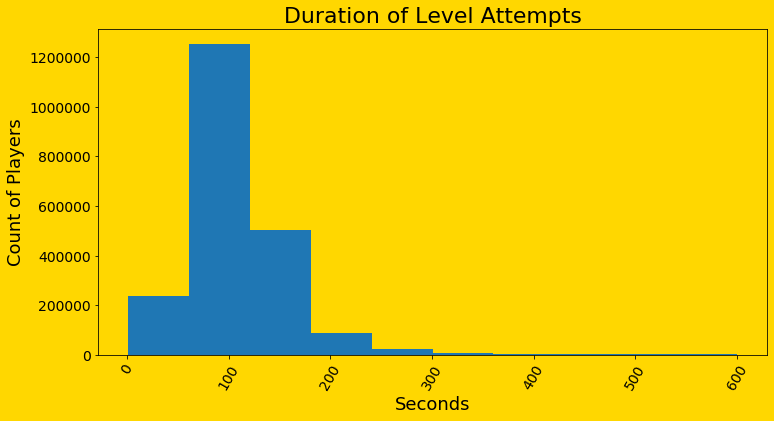

In [35]:
#Histogram of level attempt duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
users['duration'].plot(kind='hist')
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Duration of Level Attempts', fontsize=22)
#plt.tight_layout()
plt.show()

In [36]:
#Summary statistics for ratio of remaining steps to limited steps (zero is failure)
users['reststep'].describe()

count   2125029.00
mean          0.17
std           0.23
min           0.00
25%           0.00
50%           0.05
75%           0.29
max           1.00
Name: reststep, dtype: float64

In [37]:
#Bins of remaining steps
users['reststep'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

(-0.001, 0.1]    1214599
(0.1, 0.2]        228139
(0.2, 0.3]        182524
(0.3, 0.4]        150483
(0.4, 0.5]        131613
(0.5, 0.6]         78533
(0.6, 0.7]         61077
(0.7, 0.8]         44052
(0.9, 1.0]         18590
(0.8, 0.9]         15419
Name: reststep, dtype: int64

In [38]:
#Frequency of remaining steps (zero is failure)
users['reststep'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], normalize=True)

(-0.001, 0.1]   0.57
(0.1, 0.2]      0.11
(0.2, 0.3]      0.09
(0.3, 0.4]      0.07
(0.4, 0.5]      0.06
(0.5, 0.6]      0.04
(0.6, 0.7]      0.03
(0.7, 0.8]      0.02
(0.9, 1.0]      0.01
(0.8, 0.9]      0.01
Name: reststep, dtype: float64

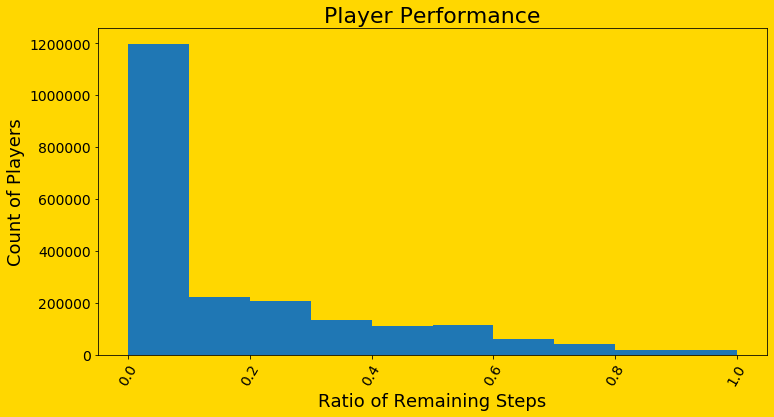

In [39]:
#Histogram of player performance in terms of their ratio of remaining steps
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
users['reststep'].plot(kind='hist')
plt.xlabel('Ratio of Remaining Steps', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Player Performance', fontsize=22)
#plt.tight_layout()
plt.show()

In [40]:
#Count of hints used 
users['help'].value_counts()

0    2031601
1      93428
Name: help, dtype: int64

In [41]:
#Frequency of hints used 
users['help'].value_counts(normalize=True)

0   0.96
1   0.04
Name: help, dtype: float64

In [42]:
#Examine time interval of data collection
print(users['time'].min(), users['time'].max())

2020-02-01 00:00:20 2020-02-04 23:59:59


In [43]:
#Assign variable for count of play sessions over time
level_time = users.groupby(['time'])['user_id'].count()

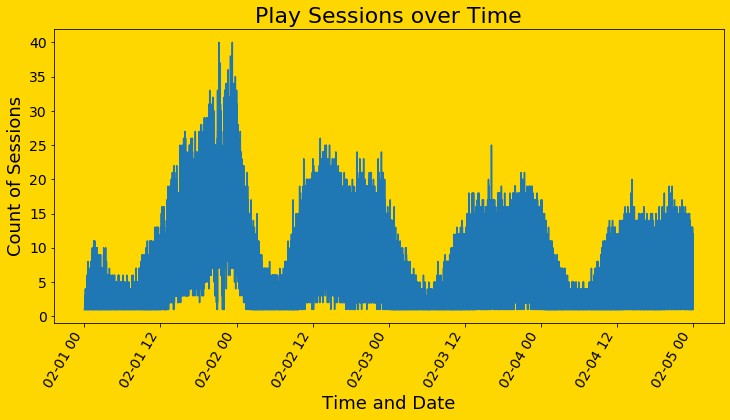

In [44]:
#Line graph of count of play sessions over time
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
level_time.plot(kind='line')
plt.xlabel('Time and Date', fontsize=18)
plt.ylabel('Count of Sessions', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Play Sessions over Time', fontsize=22)
#plt.tight_layout()
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>There are 13,589 players.</li>
    <li>There are 1509 levels.</li>
    <li>There's an almost even number of level completions and failures.</li>
    <li>Level attempt duration is unimodal around ~100 seconds and features right skewness.</li>
    <li>Player performance in terms of ratio of remaining steps is unimodal around 0.1 and features right skewness</li> 
    <li>Most users (96%) don't use hints.</li>
    <li>This data was collected from the beginning of Feb 1, 2020 to the end of Feb 4, 2020.</li>
    <li>Play time was concentrated at the following days and times:</li>
         <ol>
            <li>Feb 1: 6pm to midnight.</li>
            <li>Feb 2: Around noon and then again at night.</li>
            <li>Feb 3: Noon to midnight.</li>
            <li>Feb 4: Noon to midnight.</li>
         </ol>
</div>

In [ ]:
success_users = users['success'] --

### Step 2b: Levels

In [45]:
#Examine levels dataset
levels.head()

,level_id,f_avg_duration,f_avg_passrate,f_avg_win_duration,f_avg_retrytimes
0,1,39.89,0.94,35.58,0.02
1,2,60.68,0.99,56.72,0.00
2,3,76.95,0.99,71.79,0.00
3,4,58.17,0.99,54.84,0.00
4,5,101.78,0.95,85.65,0.03


In [46]:
#Rename columns to remove "f_"
levels.rename(columns=({'f_avg_duration':'avg_duration','f_avg_passrate':'avg_passrate',
                       'f_avg_win_duration':'avg_winduration','f_avg_retrytimes':'avg_retrytimes'}), inplace=True) 

In [47]:
#Ensure column rename success
levels.head()

,level_id,avg_duration,avg_passrate,avg_winduration,avg_retrytimes
0,1,39.89,0.94,35.58,0.02
1,2,60.68,0.99,56.72,0.00
2,3,76.95,0.99,71.79,0.00
3,4,58.17,0.99,54.84,0.00
4,5,101.78,0.95,85.65,0.03


In [48]:
#Summary statistics for average level duration
levels['avg_duration'].describe()

count   1509.00
mean     514.41
std      234.73
min       39.89
25%      372.25
50%      497.65
75%      623.59
max     2105.00
Name: avg_duration, dtype: float64

In [49]:
#Bins of average level duration
levels['avg_duration'].value_counts(bins=[0,100,200,300,400,500,600,700,800,900,1000,2000,2500]).sort_index()

(-0.001, 100.0]      24
(100.0, 200.0]       92
(200.0, 300.0]      128
(300.0, 400.0]      196
(400.0, 500.0]      322
(500.0, 600.0]      311
(600.0, 700.0]      191
(700.0, 800.0]      108
(800.0, 900.0]       56
(900.0, 1000.0]      33
(1000.0, 2000.0]     46
(2000.0, 2500.0]      2
Name: avg_duration, dtype: int64

In [50]:
#Frequency Bins of average level duration
levels['avg_duration'].value_counts(bins=[0,100,200,300,400,500,600,700,
                                          800,900,1000,2000,2500], normalize=True).sort_index()

(-0.001, 100.0]    0.02
(100.0, 200.0]     0.06
(200.0, 300.0]     0.08
(300.0, 400.0]     0.13
(400.0, 500.0]     0.21
(500.0, 600.0]     0.21
(600.0, 700.0]     0.13
(700.0, 800.0]     0.07
(800.0, 900.0]     0.04
(900.0, 1000.0]    0.02
(1000.0, 2000.0]   0.03
(2000.0, 2500.0]   0.00
Name: avg_duration, dtype: float64

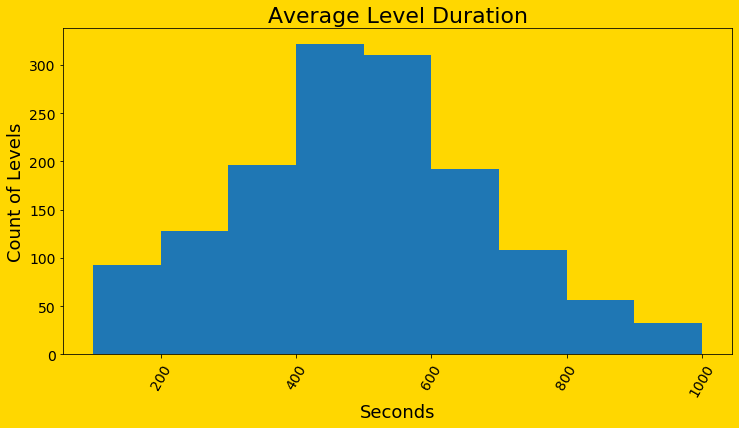

In [84]:
#Histogram of average level duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_duration'].plot(kind='hist', bins=[100,200,300,400,500,600,700,800,900,1000])
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Level Duration', fontsize=22)
#plt.tight_layout()
plt.show()

In [52]:
#Summary statistics for average passrate
levels['avg_passrate'].describe()

count   1509.00
mean       0.45
std        0.19
min        0.00
25%        0.33
50%        0.40
75%        0.51
max        1.00
Name: avg_passrate, dtype: float64

In [53]:
levels['avg_passrate'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]).sort_index()

(-0.001, 0.1]     17
(0.1, 0.2]        61
(0.2, 0.3]       176
(0.3, 0.4]       488
(0.4, 0.5]       374
(0.5, 0.6]       140
(0.6, 0.7]        85
(0.7, 0.8]        60
(0.8, 0.9]        40
(0.9, 1.0]        68
Name: avg_passrate, dtype: int64

In [54]:
levels['avg_passrate'].value_counts(bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], normalize=True).sort_index()

(-0.001, 0.1]   0.01
(0.1, 0.2]      0.04
(0.2, 0.3]      0.12
(0.3, 0.4]      0.32
(0.4, 0.5]      0.25
(0.5, 0.6]      0.09
(0.6, 0.7]      0.06
(0.7, 0.8]      0.04
(0.8, 0.9]      0.03
(0.9, 1.0]      0.05
Name: avg_passrate, dtype: float64

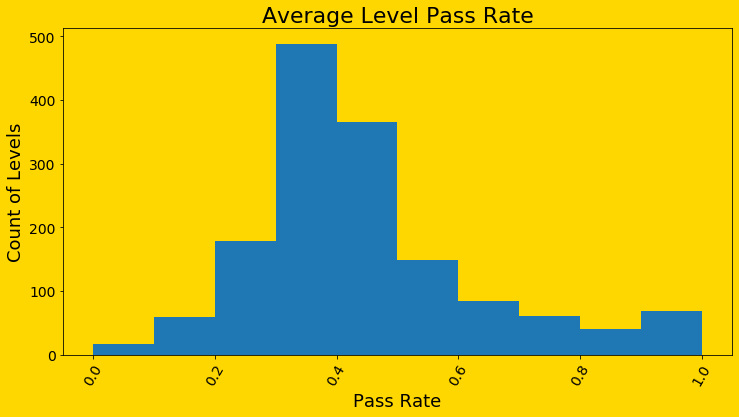

In [55]:
#Histogram of average level pass rate
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_passrate'].plot(kind='hist')
plt.xlabel('Pass Rate', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Level Pass Rate', fontsize=22)
#plt.tight_layout()
plt.show()

In [56]:
levels['avg_winduration'].describe()

count   1509.00
mean     116.01
std       27.66
min       35.58
25%      101.24
50%      112.67
75%      126.44
max      540.00
Name: avg_winduration, dtype: float64

In [57]:
#Bins of average level win duration
levels['avg_winduration'].value_counts(bins=[0,25,50,75,100,125,150,200,300,400,500,600]).sort_index()

(-0.001, 25.0]      0
(25.0, 50.0]        1
(50.0, 75.0]       25
(75.0, 100.0]     314
(100.0, 125.0]    760
(125.0, 150.0]    302
(150.0, 200.0]     89
(200.0, 300.0]     16
(300.0, 400.0]      0
(400.0, 500.0]      0
(500.0, 600.0]      2
Name: avg_winduration, dtype: int64

In [58]:
#Bins of average level win duration
levels['avg_winduration'].value_counts(bins=[0,25,50,75,100,125,150,200,300,400,500,600], normalize=True).sort_index()

(-0.001, 25.0]   0.00
(25.0, 50.0]     0.00
(50.0, 75.0]     0.02
(75.0, 100.0]    0.21
(100.0, 125.0]   0.50
(125.0, 150.0]   0.20
(150.0, 200.0]   0.06
(200.0, 300.0]   0.01
(300.0, 400.0]   0.00
(400.0, 500.0]   0.00
(500.0, 600.0]   0.00
Name: avg_winduration, dtype: float64

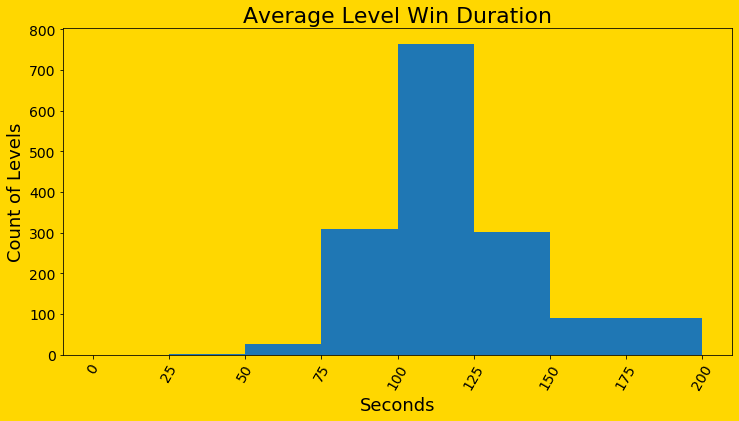

In [86]:
#Histogram of average level duration
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_winduration'].plot(kind='hist',bins=[0,25,50,75,100,125,150,200])
plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Level Win Duration', fontsize=22)
#plt.tight_layout()
plt.show()

In [61]:
#Summary statistics for average number of retries
levels['avg_retrytimes'].describe()

count   1509.00
mean       3.42
std        4.07
min        0.00
25%        2.00
50%        3.29
75%        4.41
max       98.00
Name: avg_retrytimes, dtype: float64

In [68]:
#Bins of average level retries
levels['avg_retrytimes'].value_counts(bins=[0,1,2,3,4,5,6,7,8,9,10,11,
                                            12,13,14,15,20,50,100]).sort_index()

(-0.001, 1.0]    256
(1.0, 2.0]       136
(2.0, 3.0]       251
(3.0, 4.0]       380
(4.0, 5.0]       263
(5.0, 6.0]       107
(6.0, 7.0]        52
(7.0, 8.0]        24
(8.0, 9.0]        16
(9.0, 10.0]        8
(10.0, 11.0]       3
(11.0, 12.0]       2
(12.0, 13.0]       5
(13.0, 14.0]       1
(14.0, 15.0]       0
(15.0, 20.0]       2
(20.0, 50.0]       1
(50.0, 100.0]      2
Name: avg_retrytimes, dtype: int64

In [70]:
#Frequency of bins of average level retries
levels['avg_retrytimes'].value_counts(bins=[0,1,2,3,4,5,6,7,8,9,10,100], normalize=True).sort_index()

(-0.001, 1.0]   0.17
(1.0, 2.0]      0.09
(2.0, 3.0]      0.17
(3.0, 4.0]      0.25
(4.0, 5.0]      0.17
(5.0, 6.0]      0.07
(6.0, 7.0]      0.03
(7.0, 8.0]      0.02
(8.0, 9.0]      0.01
(9.0, 10.0]     0.01
(10.0, 100.0]   0.01
Name: avg_retrytimes, dtype: float64

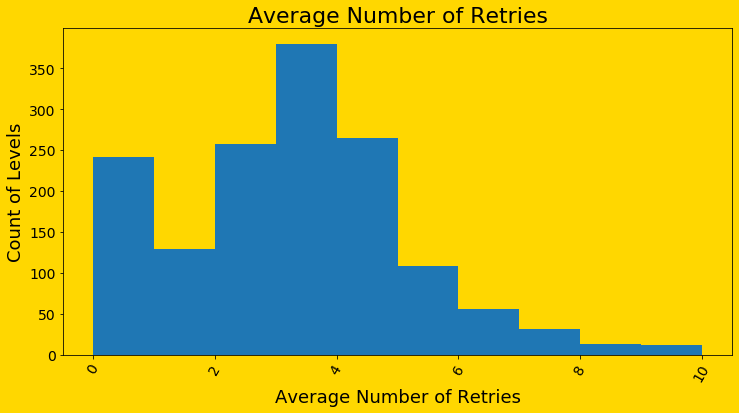

In [82]:
#Histogram of average number of retries
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
levels['avg_retrytimes'].plot(kind='hist',bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Average Number of Retries', fontsize=18)
plt.ylabel('Count of Levels', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Number of Retries', fontsize=22)
#plt.tight_layout()
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Average level duration was normally distributed around 500/600 seconds.</li>
    <li>Average level pass rate was normally distributed around 30/40%.</li>
    <li>Average level win duration was normally distributed around 100 - 125 seconds.</li>
    <li>Average number of retries was multimodal around 1, 3, 4, and 5.</li>
</div>

# Questions/Tasks

- data set of only level successes 
- data set of only level failures


# Table of Contents

[Step 1: Import Libraries and Data](#Step-1:-Import-and-Cleaning)

[Step 2: Exploratory Data Analysis](#Step-2:-EDA)

> [Step 2a: Users](#Step-2a:-Users)

> [Step 2b: Levels](#Step-2b:-Levels)